# [エルボー法](https://en.wikipedia.org/wiki/Elbow_method_(clustering))によりk-Meansクラスタリングの最適なクラスタ数kを推定する

## ライブラリ読み込み

In [91]:
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## パラメータ設定

- `data` : 分析対象の特徴量データ
- `max_cluster_num` : エルボー法によって探索する最大クラスタ数

In [92]:
data = './data/data4.csv'
max_cluster_num = 10

## データ読み込み＆可視化（可能なら）

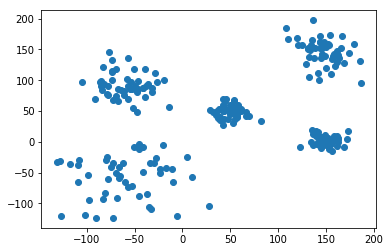

In [93]:
# データ読み込み
df = pd.read_csv(data)
data_array = df.values

if data_array.shape[1] == 2:
    plt.scatter(data_array[:,0],data_array[:,1])

## エルボー法で最適なクラスタ数を探索する

`scikit-learn.KMeans`の`inertia_`属性でクラスタ内誤差平方和（各データ点に対して所属するクラスタ重心からの距離の二乗を計算し足し合わせたもの）にアクセス出来る

理解のために、自分で計算もする

In [94]:
# エルボー法で最適なクラスタ数を探索する
sse = np.zeros((max_cluster_num,))     # Sum of Square Error（クラスタ内誤差平方和）
se = np.zeros((max_cluster_num,))      # Sum of Error（クラスタ内誤差和）
inertia = np.zeros((max_cluster_num,)) # scikit-learnにより自動計算するクラスタ内誤差平方和
for i in range(max_cluster_num):
    cluster_num = i + 1
    kmeans = KMeans(n_clusters=cluster_num)
    # 各データがどのクラスタに所属するか
    pred = kmeans.fit_predict(data_array)
    inertia[i] = kmeans.inertia_
    
    # 各データが自身の所属するクラスタ中心からどれだけ離れているか調べる
    transforms = kmeans.transform(data_array)    
    distances = np.zeros((data_array.shape[0]))
    for index in range(len(transforms)):
        distances[index] = transforms[index,pred[index]]
    
    se[i] = np.sum(distances)
    sse[i] = np.sum(distances**2)

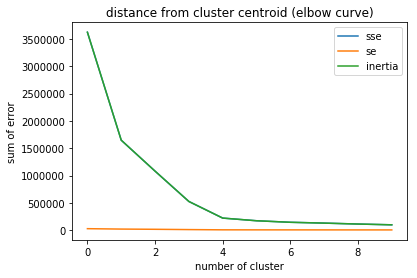

In [98]:
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
plt.plot(sse,label='sse')
plt.plot(se,label='se')
plt.plot(inertia,label='inertia')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

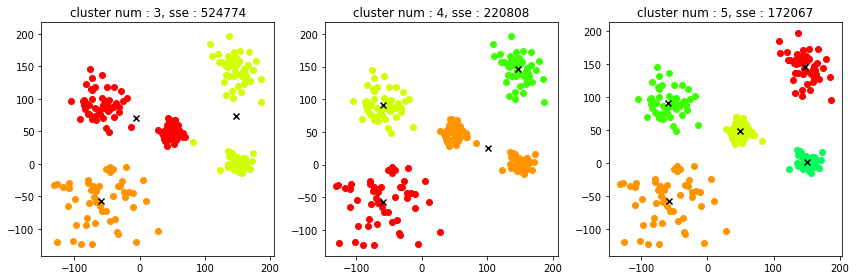

In [90]:
from matplotlib import cm
optical_cluster_num = 4

plt.figure(figsize=(12, 4))
for i,current_cluster_num in enumerate([optical_cluster_num-1,optical_cluster_num,optical_cluster_num+1]):
    kmeans = KMeans(current_cluster_num)
    pred = kmeans.fit_predict(data_array)
    centers = kmeans.cluster_centers_

    plt.subplot(1,3,i+1)
    for k in range(current_cluster_num):
        target = data_array[pred==k]
        color = cm.hsv(float(k)/cluster_num)
        plt.scatter(target[:,0],target[:,1],c=color)
    plt.scatter(centers[:,0],centers[:,1],marker='x',c='black')
    plt.title('cluster num : {}, sse : {:.0f}'.format(current_cluster_num,inertia[current_cluster_num]))
plt.tight_layout()
plt.show()

In [48]:
def estimate_optimal_cluster_num(inertia):
    '''
    最適なクラスタ数を推定する
    変化度合いが最も大きい点を算出する
    '''
    import math

    min_deg = 180.0
    opt_index = -1
    for i in range(len(elbow) - 1):
        if i == 0:
            continue
        # 対象のデータ点
        prev = elbow[i-1]
        cur = elbow[i]
        nex = elbow[i+1]
    
        # 2点の成す角
        deg1 = (-1)*math.degrees(math.atan2(nex-cur,(i+1)-i))
        deg2 = math.degrees(math.atan2(cur-prev,(i-(i-1))))
        print('deg1 {}'.format(deg1))
        print('deg2 {}'.format(deg2))
        deg = deg1 + deg2 + 90 
        print('cluster {} : {}'.format(i,deg))
        if min_deg > deg:
            min_deg = deg
            opt_index = i
    print('optimal cluster num : {}'.format(i))